## ***Let's have some fun***

In [2]:
test_target_imgs = 'weaponsdata/processed_data/images/test'
test_target_labels = 'weaponsdata/processed_data/labels/test'
train_target_imgs = 'weaponsdata/processed_data/images/train'
train_target_labels = 'weaponsdata/processed_data/labels/train'
validate_target_imgs = 'weaponsdata/processed_data/images/validate'
validate_target_labels = 'weaponsdata/processed_data/labels/validate'

In [47]:
from google.cloud import storage

# Create a client object using ADC
client = storage.Client()
bucket_name = "weaponsdata"

# Get a reference to the bucket object
bucket = client.bucket(bucket_name)

# Check if the bucket exists
if bucket.exists():
  print(f"Bucket found: {bucket.name}")
else:
  print(f"Bucket not found: {bucket_name}")


Bucket found: weaponsdata


In [1]:
def count_files_in_gcs_folder(bucket_name, folder_path):
    """Counts the number of files in a specific folder of a Google Cloud Storage (GCS) bucket.

    Args:
        bucket_name (str): The name of the GCS bucket.
        folder_path (str): The path of the folder in the GCS bucket.

    Returns:
        int: The number of files in the specified folder of the GCS bucket.
    """
    storage_client = storage.Client()
    blobs = storage_client.list_blobs(bucket_name, prefix=folder_path)
    return f'total files in the folder: {folder_path} ' + str(sum(1 for _ in blobs))
def count_files_in_gcs_bucket(bucket_name):
  """Counts the number of files in a Google Cloud Storage (GCS) bucket.

  Args:
      bucket_name (str): The name of the GCS bucket.

  Returns:
      int: The number of files in the GCS bucket.
  """
  storage_client = storage.Client()
  blobs = storage_client.list_blobs(bucket_name)
  return sum(1 for _ in blobs)


In [4]:
print(f'total files in the bucket: {bucket_name}', count_files_in_gcs_bucket('weaponsdata'))
print( count_files_in_gcs_folder('weaponsdata', test_target_imgs))
print(count_files_in_gcs_folder('weaponsdata', test_target_labels))
print(count_files_in_gcs_folder('weaponsdata', validate_target_imgs))
print(count_files_in_gcs_folder('weaponsdata', validate_target_labels))
print(count_files_in_gcs_folder('weaponsdata', train_target_imgs))
print(count_files_in_gcs_folder('weaponsdata', train_target_labels))

total files in the bucket: weaponsdata 111736
total files in the folder: weaponsdata/processed_data/images/test 2453
total files in the folder: weaponsdata/processed_data/labels/test 1490
total files in the folder: weaponsdata/processed_data/images/validate 2471
total files in the folder: weaponsdata/processed_data/labels/validate 1501
total files in the folder: weaponsdata/processed_data/images/train 60563
total files in the folder: weaponsdata/processed_data/labels/train 43254


In [6]:
# import xml.etree.ElementTree as ET
import matplotlib.patches as patches
from PIL import Image
import matplotlib.pyplot as plt
import os
import random
import io


# def plot_images_with_bboxes(xml_dir, img_dir, num_images=6):
#     xml_files = [os.path.join(xml_dir, f) for f in os.listdir(xml_dir) if f.endswith('.xml')]
#     selected_files = random.sample(xml_files, num_images)

#     fig, axs = plt.subplots(2, 3, figsize=(12, 8))

#     for i, xml_file in enumerate(selected_files):
#         tree = ET.parse(xml_file)
#         root = tree.getroot()

#         img_file = os.path.join(img_dir, root.find('filename').text)
#         img = Image.open(img_file)

#         ax = axs[i//3, i%3]
#         ax.imshow(img)
#         ax.axis('off')  # Add this line

#         for obj in root.iter('object'):
#             bbox = obj.find('bndbox')
#             xmin = int(bbox.find('xmin').text)
#             ymin = int(bbox.find('ymin').text)
#             xmax = int(bbox.find('xmax').text)
#             ymax = int(bbox.find('ymax').text)

#             rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
#             ax.add_patch(rect)

#     plt.tight_layout()
#     plt.show()



# def plot_images_with_bboxes_txt(txt_dir, img_dir, num_images=6):
#     txt_files = [os.path.join(txt_dir, f) for f in os.listdir(txt_dir) if f.endswith('.txt')]
#     selected_files = random.sample(txt_files, num_images)

#     fig, axs = plt.subplots(2, 3, figsize=(12, 8))

#     for i, txt_file in enumerate(selected_files):
#         with open(txt_file, 'r') as file:
#             lines = file.readlines()

#         img_file = os.path.join(img_dir, os.path.splitext(os.path.basename(txt_file))[0] + '.jpg')
#         img = Image.open(img_file)
#         width, height = img.size

#         ax = axs[i//3, i%3]
#         ax.imshow(img)
#         ax.axis('off')  # Add this line

#         for line in lines:
#             _, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())
#             xmin = (x_center - bbox_width / 2) * width
#             ymin = (y_center - bbox_height / 2) * height
#             xmax = xmin + bbox_width * width
#             ymax = ymin + bbox_height * height

#             rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
#             ax.add_patch(rect)

#     plt.tight_layout()
#     plt.show()

def plot_images_with_bboxes_txt_gcs(txt_dir, img_dir, bucket_name='weaponsdata', num_images=6):
    blobs = client.list_blobs(bucket_name, prefix=txt_dir)
    txt_files = [blob.name for blob in blobs if blob.name.endswith('.txt')]
    selected_files = random.sample(txt_files, num_images)

    fig, axs = plt.subplots(2, 3, figsize=(12, 8))

    for i, txt_file in enumerate(selected_files):
        blob = client.get_bucket(bucket_name).get_blob(txt_file)
        lines = blob.download_as_text().splitlines()

        img_file = os.path.join(img_dir, os.path.splitext(os.path.basename(txt_file))[0] + '.jpg')
        img_blob = client.get_bucket(bucket_name).get_blob(img_file)
        img_data = img_blob.download_as_bytes()
        img = Image.open(io.BytesIO(img_data))
        width, height = img.size

        ax = axs[i//3, i%3]
        ax.imshow(img)
        ax.axis('off')  # Add this line

        for line in lines:
            _, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())
            xmin = (x_center - bbox_width / 2) * width
            ymin = (y_center - bbox_height / 2) * height
            xmax = xmin + bbox_width * width
            ymax = ymin + bbox_height * height

            rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    plt.tight_layout()
    plt.show()

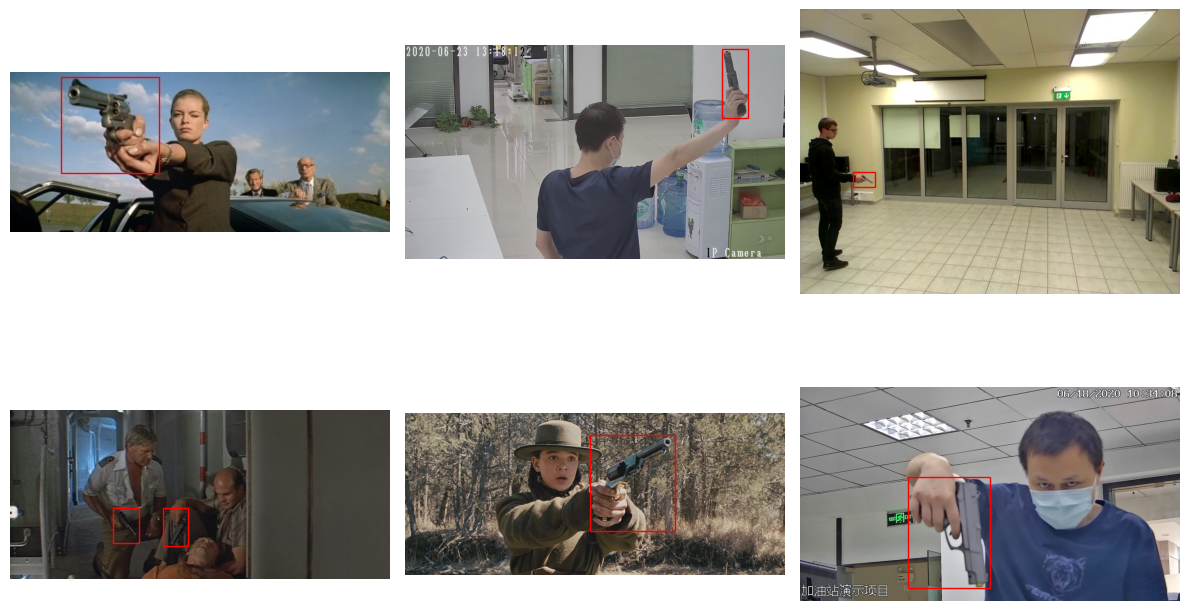

In [7]:
plot_images_with_bboxes_txt_gcs(train_target_labels, train_target_imgs)

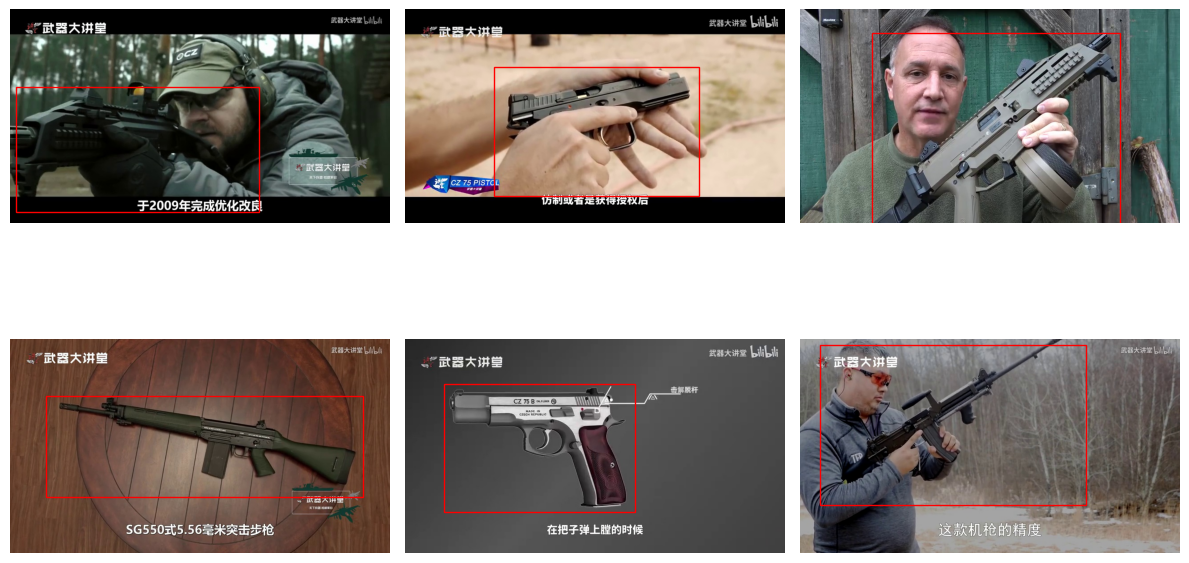

In [ ]:
plot_images_with_bboxes_txt_gcs(test_target_labels, test_target_imgs)

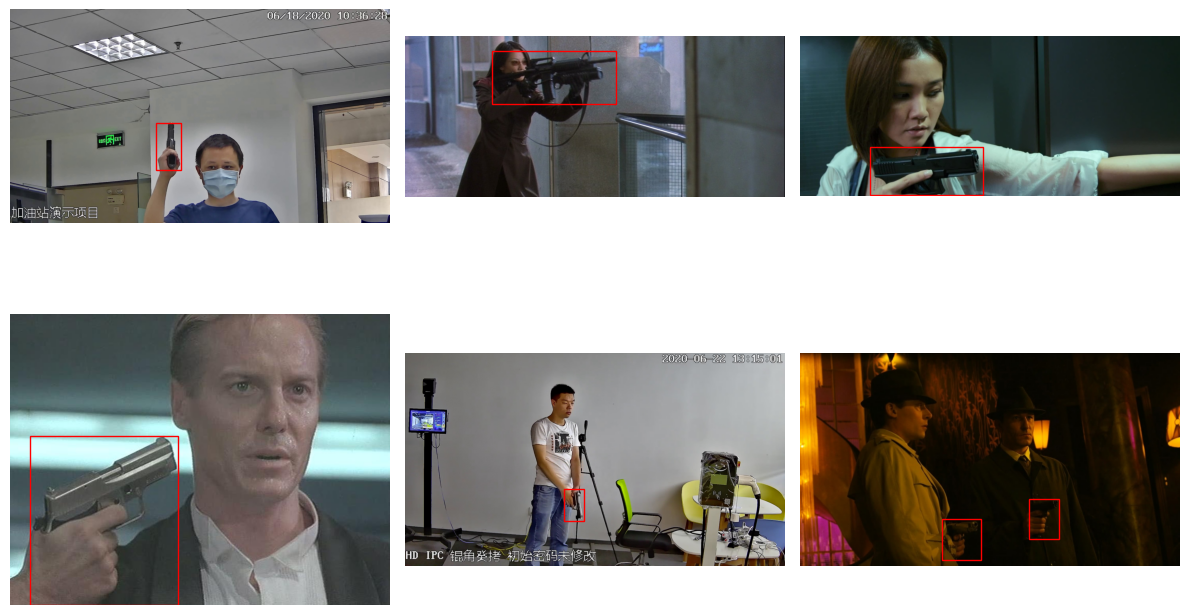

In [8]:
plot_images_with_bboxes_txt_gcs(validate_target_labels, validate_target_imgs)

In [9]:
!pip install ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (4 CPUs, 15.6 GB RAM, 34.8/94.3 GB disk)

OS                  Linux-5.15.146+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 15.63 GB
CPU                 Intel Xeon 2.20GHz
CUDA                None

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [32]:
# Load a model
model = YOLO('yolov8m.pt')  # load a pretrained model

In [55]:
if bucket.exists():
  print(f"Bucket found: {bucket.name}")
else:
  print(f"Bucket not found: {bucket_name}")

path = 'weaponsdata/processed_data/data.yaml'
# path2 = 'gs://weaponsdata/weaponsdata/processed_data/data.yaml'
blob = bucket.blob(path)

# Check if the blob exists
if blob.exists():
    print("Blob exists!")
else:
    print("Blob does not exist!")


# yaml = bucket.blob(path2)

Bucket found: weaponsdata
Blob exists!


In [65]:
#import yaml
data = blob.download_as_string()
yaml_file = yaml.safe_load(data)
print(yaml_file)

{'path': 'gs://weaponsdata/processed_data', 'train': 'images/train', 'val': 'images/validate', 'test': 'images/test', 'nc': 1, 'names': ['Weapon']}


In [ ]:
results = model.train(data=yaml_file, epochs=1, imgsz=640)  # train the model
# results = model.val()  # evaluate model performance on the validation set
# results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
# results = model.export(format='onnx')  # export the model to ONNX format

In [ ]:
# from pathlib import Path
# import tarfile

# root_dir = Path('/content/drive/MyDrive/project_data')

# # Define the detector directory and its subdirectories
# detector_dir = Path(os.path.join(root_dir, 'detector'))
# detector_gun_dir = Path(os.path.join(detector_dir, 'gun'))
# detector_other_dir = Path(os.path.join(detector_dir, 'other'))
# detector_gun_train_dir = Path(os.path.join(detector_gun_dir, 'Train'))
# detector_gun_test_dir = Path(os.path.join(detector_gun_dir, 'Test'))


# # Define the train and test images and annotations directories
# detector_gun_train_imgs = Path(os.path.join(detector_gun_train_dir, 'gntrnimgs'))
# detector_gun_train_annots = Path(os.path.join(detector_gun_train_dir, 'Annotations'))
# detector_gun_test_imgs = Path(os.path.join(detector_gun_test_dir, 'gntstimgs'))
# detector_gun_test_annots = Path(os.path.join(detector_gun_test_dir, 'Annotations'))
# detector_other_train_imgs = Path(os.path.join(detector_other_dir, 'othrtrnimgs'))
# detector_other_test_imgs = Path(os.path.join(detector_other_dir, 'othrtstimgs'))


### Define the classifier directory and its subdirectories
# classifier_dir = os.path.join(root_dir, 'classifier')
# classifier_gun_dir = os.path.join(classifier_dir, 'gun')
# classifier_other_dir = os.path.join(classifier_dir, 'other')
# classifier_other_train_dir = os.path.join(classifier_other_dir, 'train')


### Define the classifier train and test images directories
# classifier_gun_train_imgs = os.path.join(classifier_gun_dir, 'train')
# classifier_gun_test_imgs = os.path.join(classifier_gun_dir, 'test')
# classifier_other_train_imgs = os.path.join(classifier_other_train_dir, 'other')
# classifier_other1_train_imgs = os.path.join(classifier_other_train_dir, 'other1')
# classifier_other2_train_imgs = os.path.join(classifier_other_train_dir, 'other2')
# classifier_other3_train_imgs = os.path.join(classifier_other_train_dir, 'other3')
# classifier_other_test_imgs = os.path.join(classifier_other_dir, 'test')

# Define tar source files paths
# detector_other_file = '/content/drive/MyDrive/Spaghitti/Gun-Dataset/detector/other/Two/Error2.tar'
# detector_test_file = '/content/drive/MyDrive/Spaghitti/Gun-Dataset/detector/gun/Test.tar'
# detector_train_file = '/content/drive/MyDrive/Spaghitti/Gun-Dataset/detector/gun/Train.tar'
# # classifier_gun_file = '/content/drive/MyDrive/Gun-Dataset/classifier/gun.tar.gz'
# # classifier_other_file = '/content/drive/MyDrive/Gun-Dataset/classifier/other.tar.gz'






In [ ]:
# !nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [34]:
# import shutil



# def extract_file(file_name, path_of_extraction):
#   with tarfile.open(file_name) as tar:
#       tar.extractall(path=path_of_extraction)

# def shuffle_split_move(source_dir, sub_dir1, sub_dir2, split_ratio=0.95):
#     # List all files in the source directory
#     files = os.listdir(source_dir)
#     random.shuffle(files)  # Shuffle the list of files

#     # Calculate the split point based on the ratio
#     split_point = int(len(files) * split_ratio)

#     # Create subdirectories if they don't exist
#     os.makedirs(os.path.join(source_dir, sub_dir1), exist_ok=True)
#     os.makedirs(os.path.join(source_dir, sub_dir2), exist_ok=True)

#     # Move files to the respective subdirectories based on the split point
#     for i, file_name in enumerate(files):
#         source_file_path = os.path.join(source_dir, file_name)
#         if os.path.isdir(source_file_path):
#             continue  # Skip directories
#         if i < split_point:
#             destination_file_path = os.path.join(source_dir, sub_dir1, file_name)
#         else:
#             destination_file_path = os.path.join(source_dir, sub_dir2, file_name)
#         shutil.move(source_file_path, destination_file_path)



# def move_files(source_dir, target_dir):

#     try:
#         # Create the target directory if it does not exist
#         if not os.path.exists(target_dir):
#             os.makedirs(target_dir)

#         # Iterate over each file in the source directory
#         for file_name in os.listdir(source_dir):
#             # Get the full path of the source file
#             source_file_path = os.path.join(source_dir, file_name)

#             # Get the full path of the target file
#             target_file_path = os.path.join(target_dir, file_name)

#             # Move the file from the source to the target directory
#             shutil.move(source_file_path, target_file_path)

#         print(f"All files from '{source_dir}' successfully moved to '{target_dir}'.")
#     except Exception as e:
#         print(f"Error moving files: {e}")


## shuffle_split_move(detector_other_dir, detector_other_train_imgs, detector_other_test_imgs, split_ratio=0.95)

# def undo_move_files(source_dir, sub_dir1, sub_dir2):
#     # Get the list of files in subdirectories
#     files_sub1 = os.listdir(os.path.join(source_dir, sub_dir1))
#     files_sub2 = os.listdir(os.path.join(source_dir, sub_dir2))

#     # Move files back to the source directory
#     for file_name in files_sub1:
#         source_file_path = os.path.join(source_dir, sub_dir1, file_name)
#         destination_file_path = os.path.join(source_dir, file_name)
#         shutil.move(source_file_path, destination_file_path)

#     for file_name in files_sub2:
#         source_file_path = os.path.join(source_dir, sub_dir2, file_name)
#         destination_file_path = os.path.join(source_dir, file_name)
#         shutil.move(source_file_path, destination_file_path)



# def copy_directory(source_dir, target_dir):

#     try:
#         # Copy the entire source directory and its contents to the target directory
#         shutil.copytree(source_dir, os.path.join(target_dir, os.path.basename(source_dir)))

#         print(f"Directory '{source_dir}' and its contents successfully copied to '{target_dir}'.")
#     except Exception as e:
#         print(f"Error copying directory: {e}")




# # Function to delete files from a directory
# def delete_files_from_dir(dir):
#   files = os.listdir(dir)

#   # Iterate through the files and delete each one
#   for file in files:
#       file_path = os.path.join(dir, file)
#       try:
#           if os.path.isfile(file_path):  # Check if it's a file
#               os.remove(file_path)  # Delete the file
#       except Exception as e:
#           print(f"Error deleting file: {file_path}, {e}")



# def ty_copy_files_unique(source_dir, target_dir):

#     # Iterate through files in the source directory
#     for filename in os.listdir(source_dir):
#         source_file = os.path.join(source_dir, filename)
#         target_file = os.path.join(target_dir, filename)

#         # Check if the file already exists in the target directory
#         if not os.path.exists(target_file):
#             # Copy the file to the target directory
#             shutil.copy2(source_file, target_file)



# def op_copy_files_unique(source_dir, target_dir):

#     # Create a set of existing filenames in the target directory
#     existing_files = set(os.listdir(target_dir))

#     # Iterate through files in the source directory
#     with os.scandir(source_dir) as it:
#         for entry in it:
#             if not entry.name.startswith('.') and entry.is_file():
#                 source_file = entry.path
#                 target_file = os.path.join(target_dir, entry.name)

#                 # Check if the file already exists in the target directory
#                 if entry.name not in existing_files:
#                     # Copy the file to the target directory
#                     shutil.copy2(source_file, target_file)




# def copy_directory_parallel(source_dir, target_dir, num_processes=4):


#     try:
#         os.makedirs(target_dir, exist_ok=True)  # Ensure target directory exists

#         with multiprocessing.Pool(num_processes) as pool:
#             for root, _, files in os.walk(source_dir):
#                 relative_root = os.path.relpath(root, source_dir)
#                 target_root = os.path.join(target_dir, relative_root)

#                 # Create target directories in parallel
#                 pool.map(os.makedirs, [target_root])

#                 # Copy files in parallel
#                 pool.starmap(shutil.copy2, [(os.path.join(root, file), os.path.join(target_root, file)) for file in files])

#         print(f"Directory '{source_dir}' and its contents successfully copied to '{target_dir}' in parallel.")

#     except Exception as e:
#         print(f"Error copying directory: {e}")


# import shutil

# def delete_directory(dir):

#     try:
#         if os.path.exists(dir):
#             shutil.rmtree(dir)
#             print(f"Directory '{dir}' successfully deleted.")
#         else:
#             print(f"Directory '{dir}' does not exist.")
#     except Exception as e:
#         print(f"Error deleting directory '{dir}': {e}")

# delete_directory('/content/runs')
# def count_files_in_directories(directories):
#     for directory in directories:
#         print(f'There are {len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])} files in the {directory} directory.')



Directory '/content/runs' successfully deleted.


In [ ]:
# Check if the directory exists
# if not os.path.exists(root_dir):
#     # If not, create the directory and subdirectories
#     os.makedirs(root_dir)
#     os.makedirs(detector_dir)
#     os.makedirs(detector_gun_dir)
#     # os.makedirs(classifier_dir)

#     # extracting files into specified directories
#     extract_file(detector_other_file, detector_dir)
#     extract_file(detector_train_file, detector_gun_dir)
#     extract_file(detector_test_file, detector_gun_dir)
#     # extract_file(classifier_gun_file, classifier_dir)
#     # extract_file(classifier_other_file, classifier_dir)

# # Check if the directory exists
# if not os.path.exists(detector_dir):
#     # If not, create the directory and subdirectories
#     os.makedirs(detector_dir)
#     os.makedirs(detector_gun_dir)

#     # extracting files into specified directories
#     extract_file(detector_train_file, detector_gun_dir)
#     extract_file(detector_test_file, detector_gun_dir)
#     extract_file(detector_other_file, detector_dir)

# # Check if the directory exists
# if not os.path.exists(detector_gun_dir):
#     # If not, create the directory and subdirectories
#     os.makedirs(detector_gun_dir)

#     # extracting files into specified directories
#     extract_file(detector_train_file, detector_gun_dir)
#     extract_file(detector_test_file, detector_gun_dir)

### Check if the directory exists
# if not os.path.exists(classifier_dir):
## If not, create the directory
#     os.makedirs(classifier_dir)

## extracting files into specified directories
#     extract_file(classifier_gun_file, classifier_dir)
#     extract_file(classifier_other_file, classifier_dir)

### Check if the directory exists
# if not os.path.exists(classifier_gun_dir):

## extracting files into specified directories
#     extract_file(classifier_gun_file, classifier_dir)

### Check if the directory exists
# if not os.path.exists(classifier_other_dir):

## extracting files into specified directories
#     extract_file(classifier_other_file, classifier_dir)

In [ ]:
# directories = [detector_gun_train_imgs, detector_gun_train_annots, detector_gun_test_imgs, detector_gun_test_annots, detector_other_train_imgs, detector_other_test_imgs]
# count_files_in_directories(directories)

In [ ]:
# def show_imgs(directory):

#     # List all files in the directory
#     files = os.listdir(directory)

#     # Filter out image files (assuming they have common image extensions like .jpg, .png, etc.)
#     image_files = [file for file in files if file.endswith(('.jpg', '.png', '.jpeg'))]

#     # Randomly select 5 images
#     random_images = random.sample(image_files, 5)

#     # Display the randomly selected images
#     fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Create a subplot with 1 row and 5 columns

#     for i, image_file in enumerate(random_images):  # Iterate over the randomly selected image files
#         image_path = os.path.join(directory, image_file)
#         image = cv2.imread(image_path)  # Read the image using OpenCV
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
#         axes[i].imshow(image)  # Display the image
#         axes[i].axis('off')  # Hide axis
#         axes[i].set_title(f'Image {i+1}')  # Set title for the image

#     plt.tight_layout()  # Adjust layout to prevent overlap
#     plt.show()  # Show the plot


In [ ]:
# directories = [detector_gun_test_imgs, detector_gun_train_imgs, detector_other_test_imgs, detector_other_train_imgs]
# for dir in directories:
#   print(f'examples from {dir} directory: ')
#   show_imgs(dir)
#   print('\n')

In [ ]:
# from concurrent.futures import ThreadPoolExecutor
# import xml.etree.ElementTree as ET
# import time
# # import multiprocessing
# # import threading
# # import logging

# def parse_xml(xml_path, target_labels_path):
#     try:
#         root = ET.parse(xml_path).getroot()
#     except ET.ParseError:
#         print(f"Error parsing XML file: {xml_path}")
#         return

#     width = float(root.find('size').find('width').text)
#     height = float(root.find('size').find('height').text)

#     img_basename = xml_path.stem
#     label_path = target_labels_path / f'{img_basename}.txt'

#     # Check if the label file already exists, if it does, return
#     if label_path.exists():
#         return

#     bboxs = []
#     for obj in root.findall('object'):
#         xmin = float(obj.find('bndbox').find('xmin').text)
#         ymin = float(obj.find('bndbox').find('ymin').text)
#         xmax = float(obj.find('bndbox').find('xmax').text)
#         ymax = float(obj.find('bndbox').find('ymax').text)

#         xc = (xmin + xmax) / 2 / width
#         yc = (ymin + ymax) / 2 / height
#         w = (xmax - xmin) / width
#         h = (ymax - ymin) / height

#         bboxs.append((xc, yc, w, h))

#     with open(label_path, 'wt') as fp:
#         labels = '\n'.join(f'0 {bbox[0]} {bbox[1]} {bbox[2]} {bbox[3]}' for bbox in bboxs)
#         fp.write(labels)


# def process_images(base_annotations_path, target_labels_path):
#     base_annotations = list(base_annotations_path.glob('*.xml'))
#     BATCH_SIZE = 500  # Adjust this if needed

#     for i in range(0, len(base_annotations), BATCH_SIZE):
#         batch = base_annotations[i:i+BATCH_SIZE]
#         with ThreadPoolExecutor() as executor:
#             for xml_path in batch:
#                 executor.submit(parse_xml, xml_path, target_labels_path)

#         time.sleep(5)  # Sleep for 5 seconds between each batch
#         print(f"Finished sleep cycle {i // BATCH_SIZE + 1}")


# def process_images(base_annotations_path, target_labels_path):
#     base_annotations = list(base_annotations_path.glob('*.xml'))
#     BATCH_SIZE = 500  # Adjust this if needed

#     for i in range(0, len(base_annotations), BATCH_SIZE):
#         batch = base_annotations[i:i+BATCH_SIZE]
#         with ThreadPoolExecutor() as executor:
#             for xml_path in batch:
#                 executor.submit(parse_xml, xml_path, target_labels_path)


# def process_images(base_annotations_path, target_labels_path):
#     base_annotations = list(base_annotations_path.glob('*.xml'))
#     random.shuffle(base_annotations)

#     with ThreadPoolExecutor() as executor:
#         for xml_path in base_annotations:
#             executor.submit(parse_xml, xml_path, target_labels_path)



# logging.basicConfig(filename='parsing_log.txt', level=logging.INFO)

# file_access_lock = threading.Lock()  # Global lock

# def parse_xml(xml_path, target_labels_path):

#     logging.info(f"Thread {threading.get_ident()} starting to process: {xml_path}")

#     try:
#         root = ET.parse(xml_path).getroot()
#     except ET.ParseError:
#         logging.error(f"Error parsing XML file: {xml_path}")
#         return

#     width = float(root.find('size').find('width').text)
#     height = float(root.find('size').find('height').text)

#     img_basename = xml_path.stem
#     label_path = target_labels_path / f'{img_basename}.txt'

#     with file_access_lock:  # Acquire lock for critical section
#         logging.info(f"Thread {threading.get_ident()} acquired the lock.")
#         if label_path.exists():  # Prevent re-parsing
#             logging.info(f"Thread {threading.get_ident()}: Label exists, skipping - {label_path}")
#             return


#     bboxs = []
#     for obj in root.findall('object'):
#         xmin = float(obj.find('bndbox').find('xmin').text)
#         ymin = float(obj.find('bndbox').find('ymin').text)
#         xmax = float(obj.find('bndbox').find('xmax').text)
#         ymax = float(obj.find('bndbox').find('ymax').text)

#         xc = (xmin + xmax) / (2 * width)  # Adjust calculation
#         yc = (ymin + ymax) / (2 * height)  # Adjust calculation
#         w = (xmax - xmin) / width
#         h = (ymax - ymin) / height

#         bboxs.append((xc, yc, w, h))

#         logging.info(f"Thread {threading.get_ident()}: Writing label file - {label_path}")
#         with open(label_path, 'wt') as fp:
#             labels = '\n'.join(f'0 {bbox[0]} {bbox[1]} {bbox[2]} {bbox[3]}' for bbox in bboxs)
#             fp.write(labels)
#         logging.info(f"Thread {threading.get_ident()} finished writing: {label_path}")

# def process_images(base_annotations_path, target_labels_path):
#     base_annotations = list(base_annotations_path.glob('*.xml'))

#     with ThreadPoolExecutor() as executor:
#         for xml_path in base_annotations:
#             executor.submit(parse_xml, xml_path, target_labels_path)




In [ ]:
# !pip install --upgrade pip


In [ ]:
# !pip install google-cloud-storage

1490

In [ ]:
# op_copy_files_unique(detector_gun_train_imgs, train_target_imgs)
# op_copy_files_unique(detector_gun_test_imgs, test_target_imgs)
# op_copy_files_unique(detector_other_train_imgs, train_target_imgs)
# op_copy_files_unique(detector_other_test_imgs, test_target_imgs)
# cProfile.run('process_images(detector_gun_train_annots, train_target_labels)')


# def move_files(imgs_source_directory, imgs_destination_directory, imgs_check_directory, file_count, labels_source_directory=None, labels_destination_directory=None):
#     # List files in the directories
#     imgs_source_files = set(os.listdir(imgs_source_directory))
#     imgs_destination_files = set(os.listdir(imgs_destination_directory))
#     imgs_check_files = set(os.listdir(imgs_check_directory))

#     # Find files that are in imgs_source_directory but not in imgs_destination_directory or imgs_check_directory
#     files_to_move = imgs_source_files - imgs_destination_files - imgs_check_files

#     # If there are more files to move than file_count, randomly select file_count files
#     if len(files_to_move) > file_count:
#         files_to_move = random.sample(files_to_move, file_count)

#     # Move the files
#     for file_name in files_to_move:
#         shutil.move(os.path.join(imgs_source_directory, file_name), imgs_destination_directory)

#         # If label directories are provided, move the corresponding label file
#         if labels_source_directory and labels_destination_directory:
#             label_file_name = os.path.splitext(file_name)[0] + '.txt'  # replace with your label file extension
#             shutil.move(os.path.join(labels_source_directory, label_file_name), labels_destination_directory)

In [ ]:
# move_files(train_target_imgs, validate_target_imgs, detector_other_train_imgs, 1500, labels_source_directory=train_target_labels, labels_destination_directory=validate_target_labels)

In [ ]:
# move_files(train_target_imgs, validate_target_imgs, detector_gun_train_imgs, 970)
# diress = [validate_target_labels, validate_target_imgs]
# count_files_in_directories(diress)

In [ ]:
# dirs_to_count = [test_target_labels, test_target_imgs, validate_target_labels, validate_target_imgs]
# count_files_in_directories(dirs_to_count)

In [ ]:
# dirs_to_count = [train_target_labels]
# count_files_in_directories(dirs_to_count)

In [ ]:
# dirs_to_count = [train_target_imgs]
# count_files_in_directories(dirs_to_count)

In [ ]:
# import cProfile
# cProfile.run('process_images(detector_gun_test_annots, test_target_labels)', filename='profile_results.prof')
# !pip install snakeviz
# import pstats
# p = pstats.Stats('profile_results.prof')
# p.strip_dirs().sort_stats(-1).print_stats()
# from google.colab import files
# files.download('profile_results.prof')
# delete_directory(train_target_labels)
# os.makedirs(train_target_labels, exist_ok=True)

In [ ]:
# process_images(detector_gun_train_annots, train_target_labels)
# process_images(detector_gun_test_annots, test_target_labels)

In [ ]:
# plot_images_with_bboxes(detector_gun_test_annots, detector_gun_test_imgs)

In [ ]:
# plot_images_with_bboxes(detector_gun_train_annots, detector_gun_train_imgs)

In [ ]:
# %%bash
